# AIAP Project Score 

In [3]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [103]:
# basic
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
import ast as ast
# scikit-learn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import math
from enum import Enum
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
# import category encoders
# get_ipython().system('pip install category_encoders')
# import category_encoders as ce
# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# ML Algo
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# SQL Lite
import sqlite3
import requests
import sqlalchemy

# mute warnings
import warnings
warnings.filterwarnings("ignore")

## 1) Download DATA using SQL from URL

In [2]:
import sqlite3
import requests

# Fetch data from a URL
response = requests.get('https://techassessment.blob.core.windows.net/aiap-preparatory-bootcamp/score.db')
score_data = sqlite3.connect('score.db')

In [3]:
## saved as db file in same home directory
score_data

In [4]:
## table name is known

import pandas as pd
import sqlalchemy

db_name = "score.db"
table_name = "score"  ## insert table name
engine = sqlalchemy.create_engine('sqlite:///%s'% db_name, execution_options={"sqlite_raw_colnames":True})

In [5]:
df = pd.DataFrame()

df = pd.read_sql_table(table_name, engine)
df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
3,3,1,No,Clubs,Auditory,FEVM1T,Female,Yes,64.0,2.0,20.0,15.0,18.0,NaN,21:00,5:00,public transport,yellow
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


In [6]:
df.columns

Index(['index', 'number_of_siblings', 'direct_admission', 'CCA',
       'learning_style', 'student_id', 'gender', 'tuition', 'final_test',
       'n_male', 'n_female', 'age', 'hours_per_week', 'attendance_rate',
       'sleep_time', 'wake_time', 'mode_of_transport', 'bag_color'],
      dtype='object')

In [7]:
df.describe()

,index,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate
count,15900.000000,15900.000000,15405.000000,15900.000000,15900.000000,15900.000000,15900.000000,15122.000000
mean,7949.500000,0.886541,67.165401,13.880000,8.906038,15.213459,10.312579,93.270268
std,4590.078975,0.751346,13.977879,6.552584,6.663852,1.758941,4.461861,7.984230
min,0.000000,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000
25%,3974.750000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000
50%,7949.500000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000
75%,11924.250000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000
max,15899.000000,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000


## 2) EDA and Data Preprocessing

In [8]:
## reset index and drop na
df.dropna(inplace=True)
df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


In [9]:
df.isna().sum()


index                 0
number_of_siblings    0
direct_admission      0
CCA                   0
learning_style        0
student_id            0
gender                0
tuition               0
final_test            0
n_male                0
n_female              0
age                   0
hours_per_week        0
attendance_rate       0
sleep_time            0
wake_time             0
mode_of_transport     0
bag_color             0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14648 entries, 0 to 15899
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               14648 non-null  int64  
 1   number_of_siblings  14648 non-null  int64  
 2   direct_admission    14648 non-null  object 
 3   CCA                 14648 non-null  object 
 4   learning_style      14648 non-null  object 
 5   student_id          14648 non-null  object 
 6   gender              14648 non-null  object 
 7   tuition             14648 non-null  object 
 8   final_test          14648 non-null  float64
 9   n_male              14648 non-null  float64
 10  n_female            14648 non-null  float64
 11  age                 14648 non-null  float64
 12  hours_per_week      14648 non-null  float64
 13  attendance_rate     14648 non-null  float64
 14  sleep_time          14648 non-null  object 
 15  wake_time           14648 non-null  object 
 16  mode_of_t

In [11]:
## drop columns that have no relevance
df.drop(columns=['bag_color'], inplace=True)
df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk


In [12]:
## filter to leave unique student ID only 
dup_rows= pd.DataFrame()
dup_rows=df[df.duplicated(subset=['student_id'], keep="first")]


In [13]:
dup_rows

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
455,455,2,No,Clubs,Auditory,7OQM9D,Male,No,52.0,21.0,1.0,15.0,19.0,97.0,22:00,6:00,private transport
752,752,0,No,Arts,Visual,PQ059G,Male,No,77.0,23.0,4.0,15.0,6.0,93.0,21:00,5:00,public transport
978,978,1,Yes,Sports,Visual,O5MJ5G,Male,No,44.0,29.0,1.0,16.0,1.0,66.0,0:30,6:30,private transport
1035,1035,1,Yes,None,Visual,W8KTLE,Female,No,57.0,11.0,16.0,15.0,7.0,98.0,22:30,6:30,private transport
1090,1090,0,Yes,Clubs,Auditory,2QYBOU,Female,No,72.0,17.0,2.0,6.0,10.0,97.0,21:30,5:30,public transport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15868,15868,1,No,Clubs,Visual,1FKAEF,Male,No,61.0,20.0,6.0,16.0,6.0,95.0,21:30,5:30,public transport
15871,15871,1,No,Arts,Visual,Z9YY3M,Female,No,52.0,25.0,5.0,15.0,18.0,98.0,22:00,6:00,private transport
15875,15875,0,No,Clubs,Auditory,MCO9BB,Female,Yes,68.0,17.0,4.0,16.0,13.0,99.0,22:00,6:00,private transport
15886,15886,0,No,None,Visual,72YL3P,Male,Yes,89.0,10.0,12.0,15.0,7.0,95.0,22:00,6:00,private transport


In [14]:
dup_rows1 = dup_rows=df[df.duplicated(subset=['student_id'], keep="last")]
dup_rows1

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport
12,12,0,No,Sports,Visual,T4U89N,Male,Yes,85.0,14.0,4.0,16.0,8.0,95.0,23:00,7:00,walk
14,14,0,Yes,Arts,Auditory,G0JBVS,Female,Yes,75.0,14.0,2.0,15.0,15.0,98.0,22:30,6:30,private transport
21,21,0,No,None,Visual,HJ6Y5P,Male,Yes,86.0,17.0,6.0,16.0,8.0,91.0,23:30,6:30,private transport
24,24,0,No,Arts,Visual,PQ059G,Male,No,77.0,23.0,4.0,15.0,6.0,93.0,21:00,5:00,public transport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14972,14972,0,Yes,Clubs,Auditory,H8UUPB,Female,No,75.0,6.0,13.0,16.0,18.0,99.0,22:00,6:00,private transport
15192,15192,0,No,Sports,Auditory,G365BJ,Male,No,63.0,11.0,10.0,15.0,18.0,91.0,21:30,5:30,public transport
15218,15218,1,No,Sports,Auditory,WWO54A,Female,Yes,69.0,26.0,2.0,15.0,7.0,100.0,21:30,5:30,public transport
15226,15226,0,No,None,Auditory,3YP8F0,Male,Yes,94.0,13.0,8.0,15.0,7.0,91.0,23:00,7:00,walk


In [15]:
help(df.duplicated)

Help on method duplicated in module pandas.core.frame:

duplicated(subset: 'Hashable | Sequence[Hashable] | None' = None, keep: 'DropKeep' = 'first') -> 'Series' method of pandas.core.frame.DataFrame instance
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : Equivalent method 

### We can conclude there are exactly 763 duplicates and there are only two and no more than two duplicates for every student-id that is duplicated

In [16]:

dup_all = pd.DataFrame()
dup_all = pd.concat([dup_rows, dup_rows1])
dup_all

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport
12,12,0,No,Sports,Visual,T4U89N,Male,Yes,85.0,14.0,4.0,16.0,8.0,95.0,23:00,7:00,walk
14,14,0,Yes,Arts,Auditory,G0JBVS,Female,Yes,75.0,14.0,2.0,15.0,15.0,98.0,22:30,6:30,private transport
21,21,0,No,None,Visual,HJ6Y5P,Male,Yes,86.0,17.0,6.0,16.0,8.0,91.0,23:30,6:30,private transport
24,24,0,No,Arts,Visual,PQ059G,Male,No,77.0,23.0,4.0,15.0,6.0,93.0,21:00,5:00,public transport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14972,14972,0,Yes,Clubs,Auditory,H8UUPB,Female,No,75.0,6.0,13.0,16.0,18.0,99.0,22:00,6:00,private transport
15192,15192,0,No,Sports,Auditory,G365BJ,Male,No,63.0,11.0,10.0,15.0,18.0,91.0,21:30,5:30,public transport
15218,15218,1,No,Sports,Auditory,WWO54A,Female,Yes,69.0,26.0,2.0,15.0,7.0,100.0,21:30,5:30,public transport
15226,15226,0,No,None,Auditory,3YP8F0,Male,Yes,94.0,13.0,8.0,15.0,7.0,91.0,23:00,7:00,walk


### From sampling the two dataframe of first duplicate and last duplicate, we can observe that each duplicate has the same entries for the same student_id.  Hence, we can safely delete one of a pair of duplicates, and not lose any data on that student_id 

In [17]:
df = df.drop_duplicates(subset='student_id')
df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk


In [18]:
## Now that we have filtered out duplicate entries using student_id, we can drop the column['student_id']
df1=pd.DataFrame()
df1 = df.copy()
df1=df1.drop(columns=['student_id'])
df1

,index,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport
0,0,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport
1,1,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport
2,2,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport
4,4,0,No,Sports,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport
5,5,0,No,Arts,Visual,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport
15896,15896,1,Yes,None,Auditory,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport
15897,15897,1,Yes,Sports,Auditory,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk
15898,15898,1,No,Clubs,Visual,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk


### Hours of sleep is more meaningful than sleep time or wake time alone, so we add a new column 'hrs_slept' by converting sleep time and wake time from objects into float64 then passing them through a function

In [19]:
df1['sleep_time']=pd.to_datetime(df1['sleep_time'], format='%H:%M')
df1['sleep_time']=df1['sleep_time'].dt.hour + df1['sleep_time'].dt.minute/60.0
df1['wake_time']=pd.to_datetime(df1['wake_time'], format='%H:%M')
df1['wake_time']=df1['wake_time'].dt.hour + df1['wake_time'].dt.minute/60.0


In [20]:
df1.describe()

,index,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time
count,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000
mean,7797.744833,0.889017,67.162910,13.844364,8.946417,15.205762,10.330068,93.282175,21.163990,5.999352
std,4592.541669,0.751833,13.970484,6.547714,6.680198,1.781801,4.465885,7.940341,4.269308,0.709344
min,0.000000,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000,0.000000,5.000000
25%,3803.000000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,21.500000,5.500000
50%,7707.000000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,22.000000,6.000000
75%,11763.000000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,22.500000,6.500000
max,15899.000000,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000,23.500000,7.000000


In [21]:
df1['sleep_time'].value_counts()

sleep_time
23.0    2732
22.0    2686
22.5    2654
21.0    2569
21.5    2510
0.0      213
23.5     162
1.0      105
0.5       77
2.0       72
1.5       62
2.5       23
3.0       20
Name: count, dtype: int64

In [22]:
df1['wake_time'].value_counts()

wake_time
5.0    2819
7.0    2795
6.0    2783
6.5    2759
5.5    2729
Name: count, dtype: int64

In [23]:
## we apply a defined formula to derive hrs_slept for each row
def sleep_formula(row):
    output = row['wake_time']- row['sleep_time']
    if output > 0:
        return output
    else: 
        return output + 24.0

In [24]:
df1['hrs_slept']=df1.apply(sleep_formula, axis=1)

In [25]:
df1['hrs_slept'].value_counts()

hrs_slept
8.0    12766
7.0      575
6.0      209
5.0      204
4.0      131
Name: count, dtype: int64

In [26]:
df1.describe()

,index,number_of_siblings,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,hrs_slept
count,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000
mean,7797.744833,0.889017,67.162910,13.844364,8.946417,15.205762,10.330068,93.282175,21.163990,5.999352,7.846669
std,4592.541669,0.751833,13.970484,6.547714,6.680198,1.781801,4.465885,7.940341,4.269308,0.709344,0.601098
min,0.000000,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000,0.000000,5.000000,4.000000
25%,3803.000000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,21.500000,5.500000,8.000000
50%,7707.000000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,22.000000,6.000000,8.000000
75%,11763.000000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,22.500000,6.500000,8.000000
max,15899.000000,2.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000,23.500000,7.000000,8.000000


In [27]:
## Now that we have determined hrs_slept, we can drop sleep_time and wake_time
df2 = pd.DataFrame()
df2 = df1.copy()
df2 = df2.drop(columns=['sleep_time', 'wake_time'])
df2

,index,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,hrs_slept
0,0,0,Yes,Sports,Visual,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,private transport,8.0
1,1,2,No,Sports,Auditory,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,private transport,8.0
2,2,0,Yes,None,Visual,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,private transport,8.0
4,4,0,No,Sports,Auditory,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,public transport,8.0
5,5,0,No,Arts,Visual,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,private transport,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,private transport,8.0
15896,15896,1,Yes,None,Auditory,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,private transport,8.0
15897,15897,1,Yes,Sports,Auditory,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,walk,8.0
15898,15898,1,No,Clubs,Visual,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,walk,8.0


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13885 entries, 0 to 15899
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               13885 non-null  int64  
 1   number_of_siblings  13885 non-null  int64  
 2   direct_admission    13885 non-null  object 
 3   CCA                 13885 non-null  object 
 4   learning_style      13885 non-null  object 
 5   gender              13885 non-null  object 
 6   tuition             13885 non-null  object 
 7   final_test          13885 non-null  float64
 8   n_male              13885 non-null  float64
 9   n_female            13885 non-null  float64
 10  age                 13885 non-null  float64
 11  hours_per_week      13885 non-null  float64
 12  attendance_rate     13885 non-null  float64
 13  mode_of_transport   13885 non-null  object 
 14  hrs_slept           13885 non-null  float64
dtypes: float64(7), int64(2), object(6)
memory usage: 1.7+ MB


In [29]:
## We can now replace categorical variables with numerical or dummy variables. Start by checking categorical variables: direct_admission, CCA, learning_style, gender, tuition, mode of transport.  We cannot have too many dummy variables as this will slow down the MLP, so we adopt dummy for CCA and mode of transport only
df2['CCA'].unique()

array(['Sports', 'None', 'Arts', 'ARTS', 'Clubs', 'SPORTS', 'CLUBS',
       'NONE'], dtype=object)

In [30]:
## Define mapping dictionary for CCA
CCAmap = {'Sports': 'S', 'None': 'N', 'Arts': 'A', 'ARTS':'A', 'Clubs':'C','SPORTS':'S', 'CLUBS':'C','NONE':'N'}

# Relabel categorical variable using mapping dictionary
df2['CCA'] = df2['CCA'].map(CCAmap)


In [31]:
df2['CCA'].value_counts() ## this categorical value is suitable for dummy variables


CCA
C    3548
S    3474
N    3435
A    3428
Name: count, dtype: int64

In [32]:
df2['direct_admission'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
admitmap = {'Yes':1 ,'No':0 }
df2['direct_admission']=df2['direct_admission'].map(admitmap)
df2['direct_admission'].value_counts()

direct_admission
0    9832
1    4053
Name: count, dtype: int64

In [34]:
df2['learning_style'].unique()

array(['Visual', 'Auditory'], dtype=object)

In [35]:
stylemap = {'Visual':1 ,'Auditory':0 }
df2['learning_style']=df2['learning_style'].map(stylemap)
df2['learning_style'].value_counts()

learning_style
0    8012
1    5873
Name: count, dtype: int64

In [36]:
df2['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
gendermap = {'Male':1,'Female':0 }
df2['gender']=df2['gender'].map(gendermap)
df2['gender'].value_counts()

gender
1    6950
0    6935
Name: count, dtype: int64

In [38]:
df2['tuition'].unique()

array(['No', 'Yes', 'Y', 'N'], dtype=object)

In [39]:
## Define mapping dictionary for tuition
tuitionmap = {'No':0, 'Yes':1, 'Y':1, 'N':0}
df2['tuition']=df2['tuition'].map(tuitionmap)
df2['tuition'].value_counts()

tuition
1    7870
0    6015
Name: count, dtype: int64

In [40]:
df2['mode_of_transport'].unique()

array(['private transport', 'public transport', 'walk'], dtype=object)

In [41]:
df2['mode_of_transport'].value_counts()

mode_of_transport
public transport     5548
private transport    5542
walk                 2795
Name: count, dtype: int64

In [42]:
df2.describe()

,index,number_of_siblings,direct_admission,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,hrs_slept
count,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000,13885.000000
mean,7797.744833,0.889017,0.291898,0.422974,0.500540,0.566799,67.162910,13.844364,8.946417,15.205762,10.330068,93.282175,7.846669
std,4592.541669,0.751833,0.454652,0.494049,0.500018,0.495536,13.970484,6.547714,6.680198,1.781801,4.465885,7.940341,0.601098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000,-5.000000,0.000000,40.000000,4.000000
25%,3803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,8.000000
50%,7707.000000,1.000000,0.000000,0.000000,1.000000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,8.000000
75%,11763.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,8.000000
max,15899.000000,2.000000,1.000000,1.000000,1.000000,1.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000,8.000000


In [43]:

df2['age'].value_counts()

## Given the dataset is from a secondary school, ages < 13 should logically be excluded

age
 15.0    6742
 16.0    6739
 6.0      207
 5.0      192
-5.0        4
-4.0        1
Name: count, dtype: int64

In [44]:



df2=df2[df2['age']>13]
df2


,index,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,hrs_slept
0,0,0,1,S,1,0,0,69.0,14.0,2.0,16.0,10.0,91.0,private transport,8.0
1,1,2,0,S,0,0,0,47.0,4.0,19.0,16.0,7.0,94.0,private transport,8.0
2,2,0,1,N,1,1,0,85.0,14.0,2.0,15.0,8.0,92.0,private transport,8.0
4,4,0,0,S,0,1,0,66.0,24.0,3.0,16.0,7.0,95.0,public transport,8.0
5,5,0,0,A,1,0,0,57.0,9.0,12.0,15.0,11.0,96.0,private transport,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,0,C,1,0,0,56.0,12.0,14.0,16.0,9.0,96.0,private transport,8.0
15896,15896,1,1,N,0,1,1,85.0,17.0,5.0,16.0,7.0,91.0,private transport,8.0
15897,15897,1,1,S,0,0,1,76.0,7.0,10.0,15.0,7.0,93.0,walk,8.0
15898,15898,1,0,C,1,1,1,45.0,18.0,12.0,16.0,3.0,94.0,walk,8.0


In [45]:
df2.describe()

,index,number_of_siblings,direct_admission,learning_style,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,hrs_slept
count,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000,13481.000000
mean,7787.168533,0.887323,0.291966,0.422224,0.500260,0.567836,67.194348,13.842148,8.935984,15.499889,10.325940,93.294785,7.847044
std,4585.338835,0.752042,0.454684,0.493932,0.500018,0.495395,13.961453,6.547589,6.677200,0.500019,4.465594,7.917193,0.598626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000,15.000000,0.000000,40.000000,4.000000
25%,3797.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,10.000000,4.000000,15.000000,7.000000,92.000000,8.000000
50%,7689.000000,1.000000,0.000000,0.000000,1.000000,1.000000,68.000000,14.000000,8.000000,15.000000,9.000000,95.000000,8.000000
75%,11741.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,18.000000,13.000000,16.000000,14.000000,97.000000,8.000000
max,15899.000000,2.000000,1.000000,1.000000,1.000000,1.000000,100.000000,31.000000,31.000000,16.000000,20.000000,100.000000,8.000000


In [46]:
print("Proportion of Data lost after cleaning:",(df.shape[0]-df2.shape[0])/df.shape[0])


Proportion of Data lost after cleaning: 0.02909614692113792


### This still leaves us with more than 97% of the original data, and about 13,885 entries to test-train the model.  It is sufficient for most ML models , like LR, SVM and GBA

In [47]:

# Move column 'final_test' to the end
df3=pd.DataFrame()
df3=df2.copy()
df3 = df3[[col for col in df3 if col != 'final_test'] + ['final_test']]

df3


,index,number_of_siblings,direct_admission,CCA,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,mode_of_transport,hrs_slept,final_test
0,0,0,1,S,1,0,0,14.0,2.0,16.0,10.0,91.0,private transport,8.0,69.0
1,1,2,0,S,0,0,0,4.0,19.0,16.0,7.0,94.0,private transport,8.0,47.0
2,2,0,1,N,1,1,0,14.0,2.0,15.0,8.0,92.0,private transport,8.0,85.0
4,4,0,0,S,0,1,0,24.0,3.0,16.0,7.0,95.0,public transport,8.0,66.0
5,5,0,0,A,1,0,0,9.0,12.0,15.0,11.0,96.0,private transport,8.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,0,C,1,0,0,12.0,14.0,16.0,9.0,96.0,private transport,8.0,56.0
15896,15896,1,1,N,0,1,1,17.0,5.0,16.0,7.0,91.0,private transport,8.0,85.0
15897,15897,1,1,S,0,0,1,7.0,10.0,15.0,7.0,93.0,walk,8.0,76.0
15898,15898,1,0,C,1,1,1,18.0,12.0,16.0,3.0,94.0,walk,8.0,45.0


In [48]:
## We can now drop column = index, and we are left with 13 features to train our model
df3=df3.drop(columns='index')

In [49]:
df3.columns[0:-1] 

Index(['number_of_siblings', 'direct_admission', 'CCA', 'learning_style',
       'gender', 'tuition', 'n_male', 'n_female', 'age', 'hours_per_week',
       'attendance_rate', 'mode_of_transport', 'hrs_slept'],
      dtype='object')

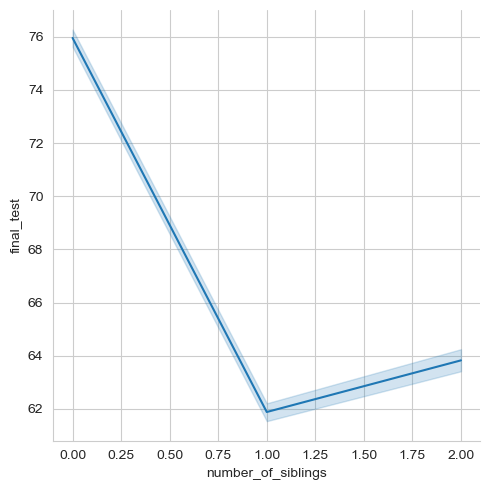

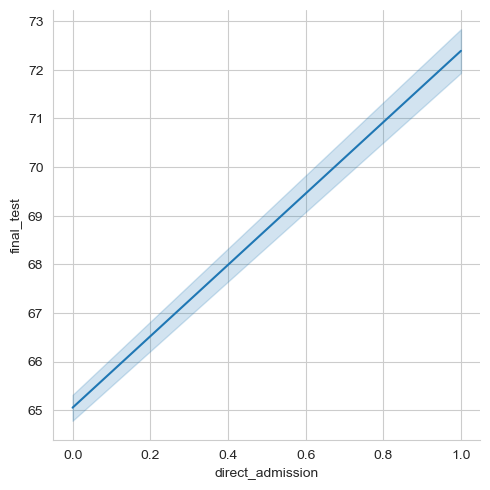

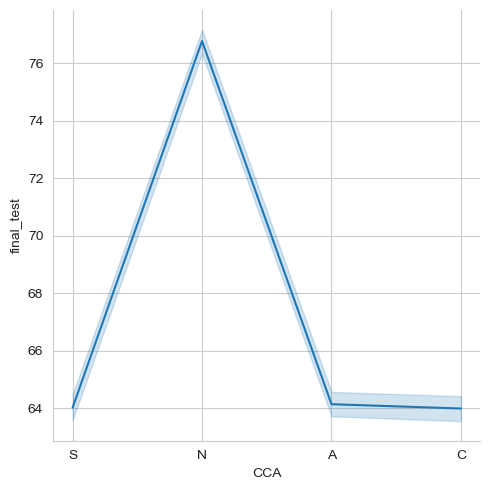

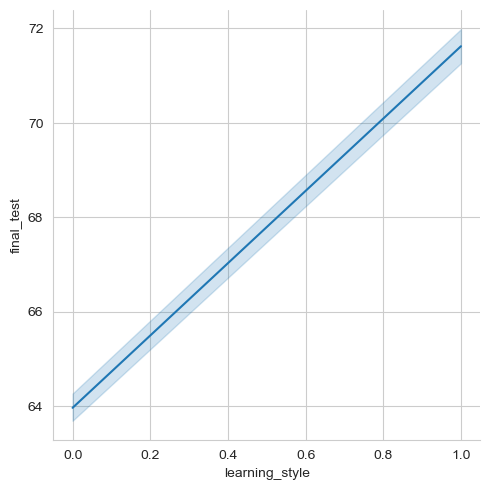

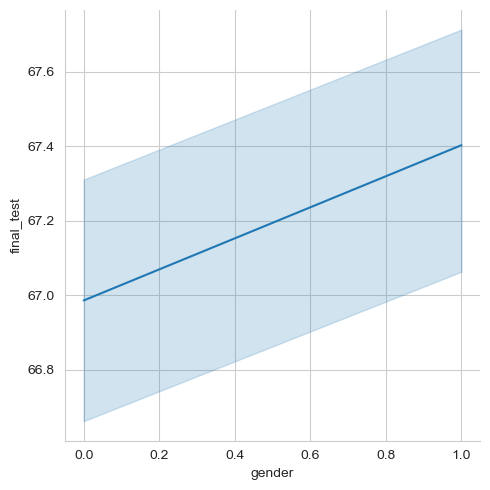

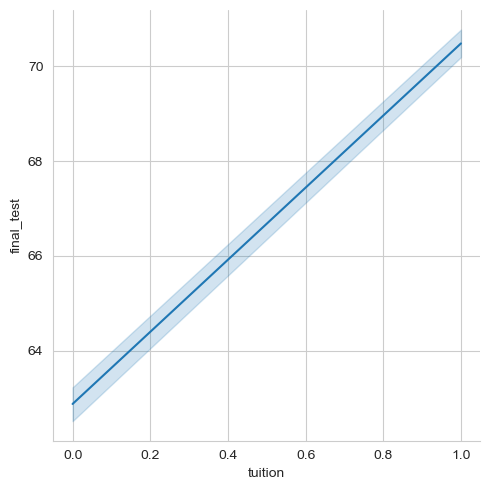

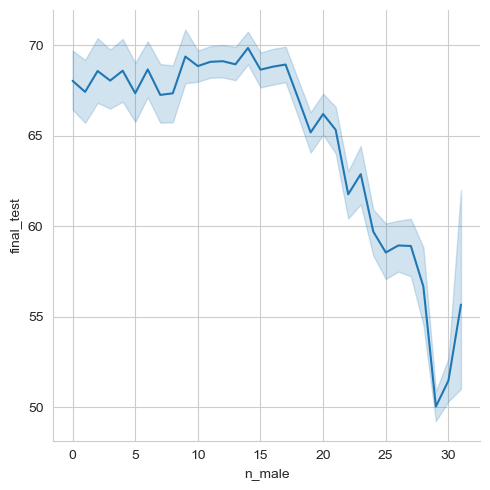

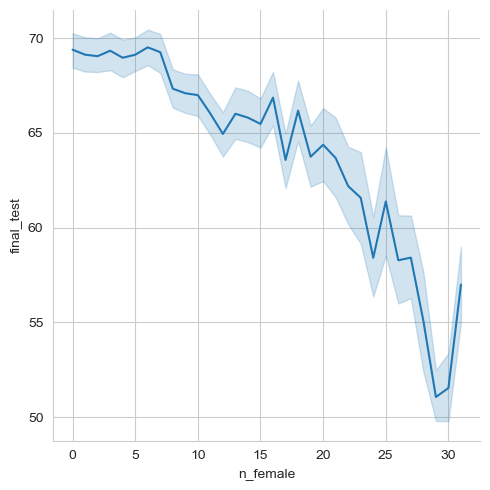

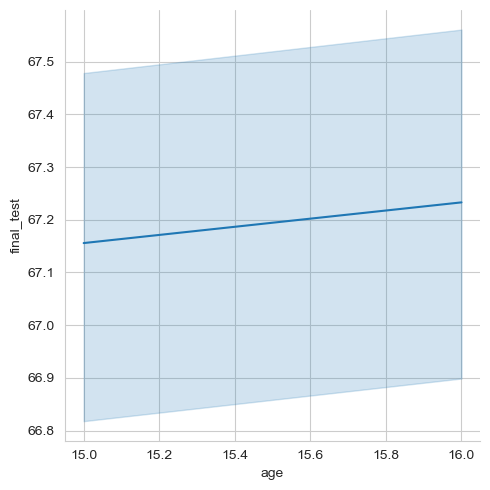

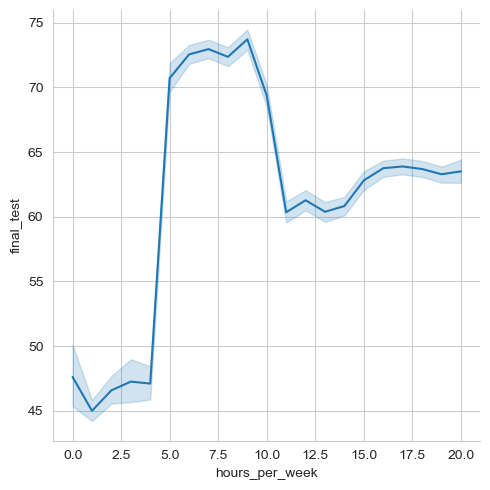

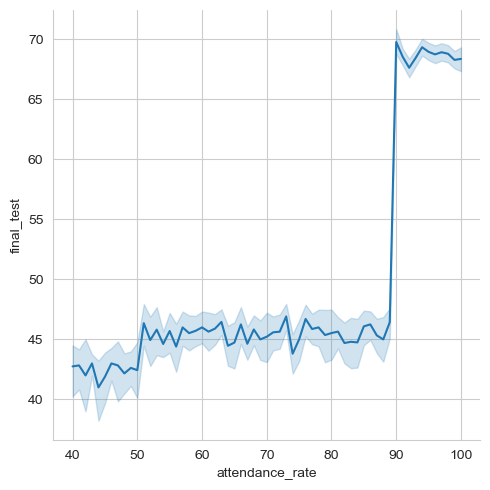

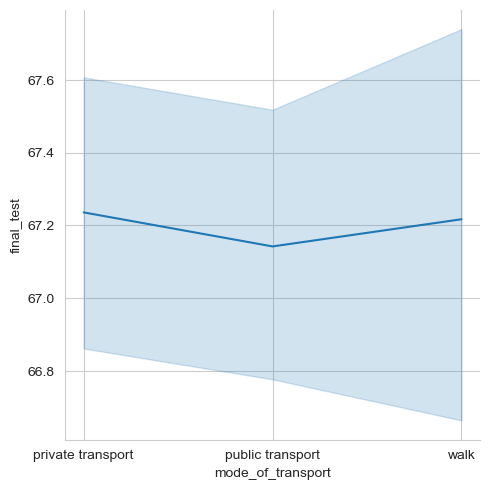

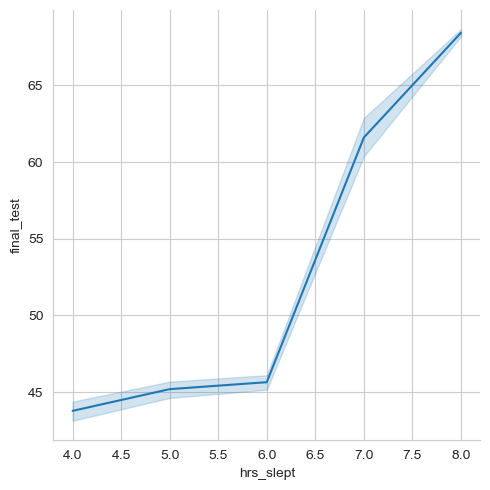

In [50]:


for col in df3.columns[0:-1]:
    display(sns.relplot(data=df3, x=col, y='final_test', kind='line'))
    

### Observations are: there's a linear relationship between y variables (final_test) and most x variables. After applying ONE-Hot Encoding to avoid bias, we can spit into test-train sets in the ratio of 80-20 and apply ML pipelines that work well with data that is linearly correlated. 
### Bear in mind, to leave out from the formula one of each set of dummies to avoid perfect collinearity.  If we add all dummies, we would leave out the regression intercept, but may not be able to use R-squared value to judge goodness of fit.   

In [51]:
## Redefine mapping dictionary for CCA
CCAmap1 = {'S':'S','A':'A','C':'C','N':'O'}
df3['CCA'] = df3['CCA'].map(CCAmap1)
df3['CCA'].value_counts()

CCA
C    3447
S    3379
O    3331
A    3324
Name: count, dtype: int64

In [52]:
df4=pd.DataFrame()
df4=pd.get_dummies(df3, columns=['CCA', 'mode_of_transport'])
df4.columns

Index(['number_of_siblings', 'direct_admission', 'learning_style', 'gender',
       'tuition', 'n_male', 'n_female', 'age', 'hours_per_week',
       'attendance_rate', 'hrs_slept', 'final_test', 'CCA_A', 'CCA_C', 'CCA_O',
       'CCA_S', 'mode_of_transport_private transport',
       'mode_of_transport_public transport', 'mode_of_transport_walk'],
      dtype='object')

In [53]:
# There are now 19 columns , including dummies. Move column 'final_test' to the end
df4 = df4[[col for col in df4 if col != 'final_test'] + ['final_test']]
df4

,number_of_siblings,direct_admission,learning_style,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,hrs_slept,CCA_A,CCA_C,CCA_O,CCA_S,mode_of_transport_private transport,mode_of_transport_public transport,mode_of_transport_walk,final_test
0,0,1,1,0,0,14.0,2.0,16.0,10.0,91.0,8.0,False,False,False,True,True,False,False,69.0
1,2,0,0,0,0,4.0,19.0,16.0,7.0,94.0,8.0,False,False,False,True,True,False,False,47.0
2,0,1,1,1,0,14.0,2.0,15.0,8.0,92.0,8.0,False,False,True,False,True,False,False,85.0
4,0,0,0,1,0,24.0,3.0,16.0,7.0,95.0,8.0,False,False,False,True,False,True,False,66.0
5,0,0,1,0,0,9.0,12.0,15.0,11.0,96.0,8.0,True,False,False,False,True,False,False,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,0,1,0,0,12.0,14.0,16.0,9.0,96.0,8.0,False,True,False,False,True,False,False,56.0
15896,1,1,0,1,1,17.0,5.0,16.0,7.0,91.0,8.0,False,False,True,False,True,False,False,85.0
15897,1,1,0,0,1,7.0,10.0,15.0,7.0,93.0,8.0,False,False,False,True,False,False,True,76.0
15898,1,0,1,1,1,18.0,12.0,16.0,3.0,94.0,8.0,False,True,False,False,False,False,True,45.0


In [54]:
## Plot Final Test as y variable
df4['final_test'].value_counts().sort_values()


final_test
35.0      4
34.0      9
32.0      9
97.0      9
99.0     12
       ... 
72.0    370
70.0    374
59.0    374
79.0    428
69.0    443
Name: count, Length: 68, dtype: int64

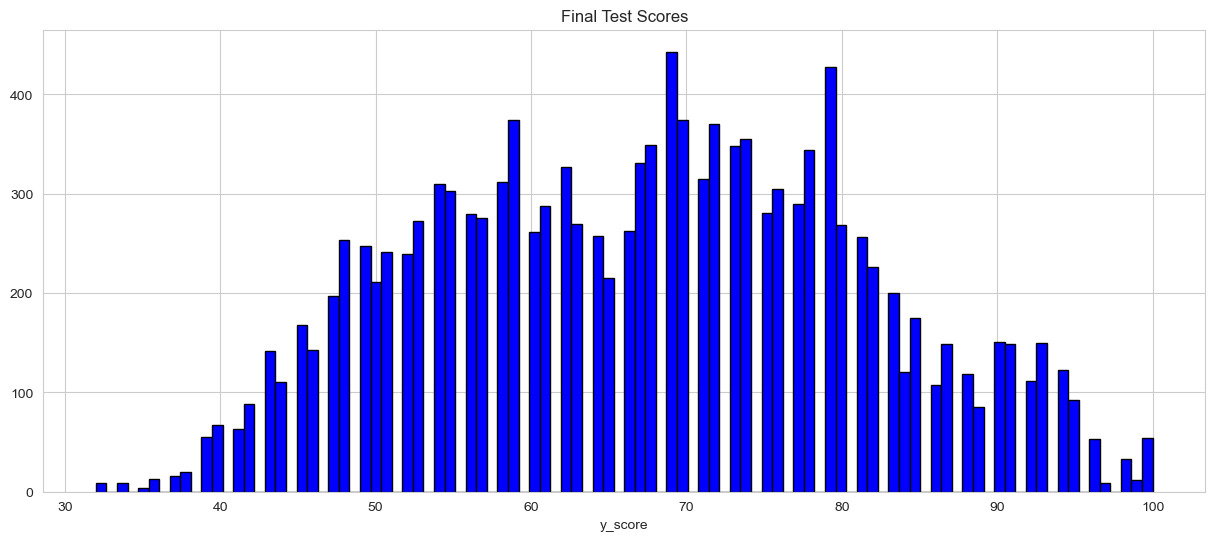

In [55]:
plt.figure(figsize=(15,6))
y_score = df4['final_test']
plt.hist(y_score, bins=100 , color='blue', edgecolor='black')
plt.title("Final Test Scores")
plt.xlabel("y_score")
plt.show()

In [56]:
print("y_score mean:", y_score.mean(),'y-score median',y_score.median(), "y_score std", y_score.std())

y_score mean: 67.19434760032638 y-score median 68.0 y_score std 13.961452892197945


### We can observe that mean and median are fairly close, so the distribution of y_scores have fairly normal skew around a mean of 67 

In [57]:
mapkey={'CCA':CCAmap1,\
        'direct_admission':admitmap,\
        'learning_style':stylemap,\
        'gender':gendermap,\
        'tuition':tuitionmap}

print(mapkey)

{'CCA': {'S': 'S', 'A': 'A', 'C': 'C', 'N': 'O'}, 'direct_admission': {'Yes': 1, 'No': 0}, 'learning_style': {'Visual': 1, 'Auditory': 0}, 'gender': {'Male': 1, 'Female': 0}, 'tuition': {'No': 0, 'Yes': 1, 'Y': 1, 'N': 0}}


<Axes: title={'center': 'Correlation Matrix'}>

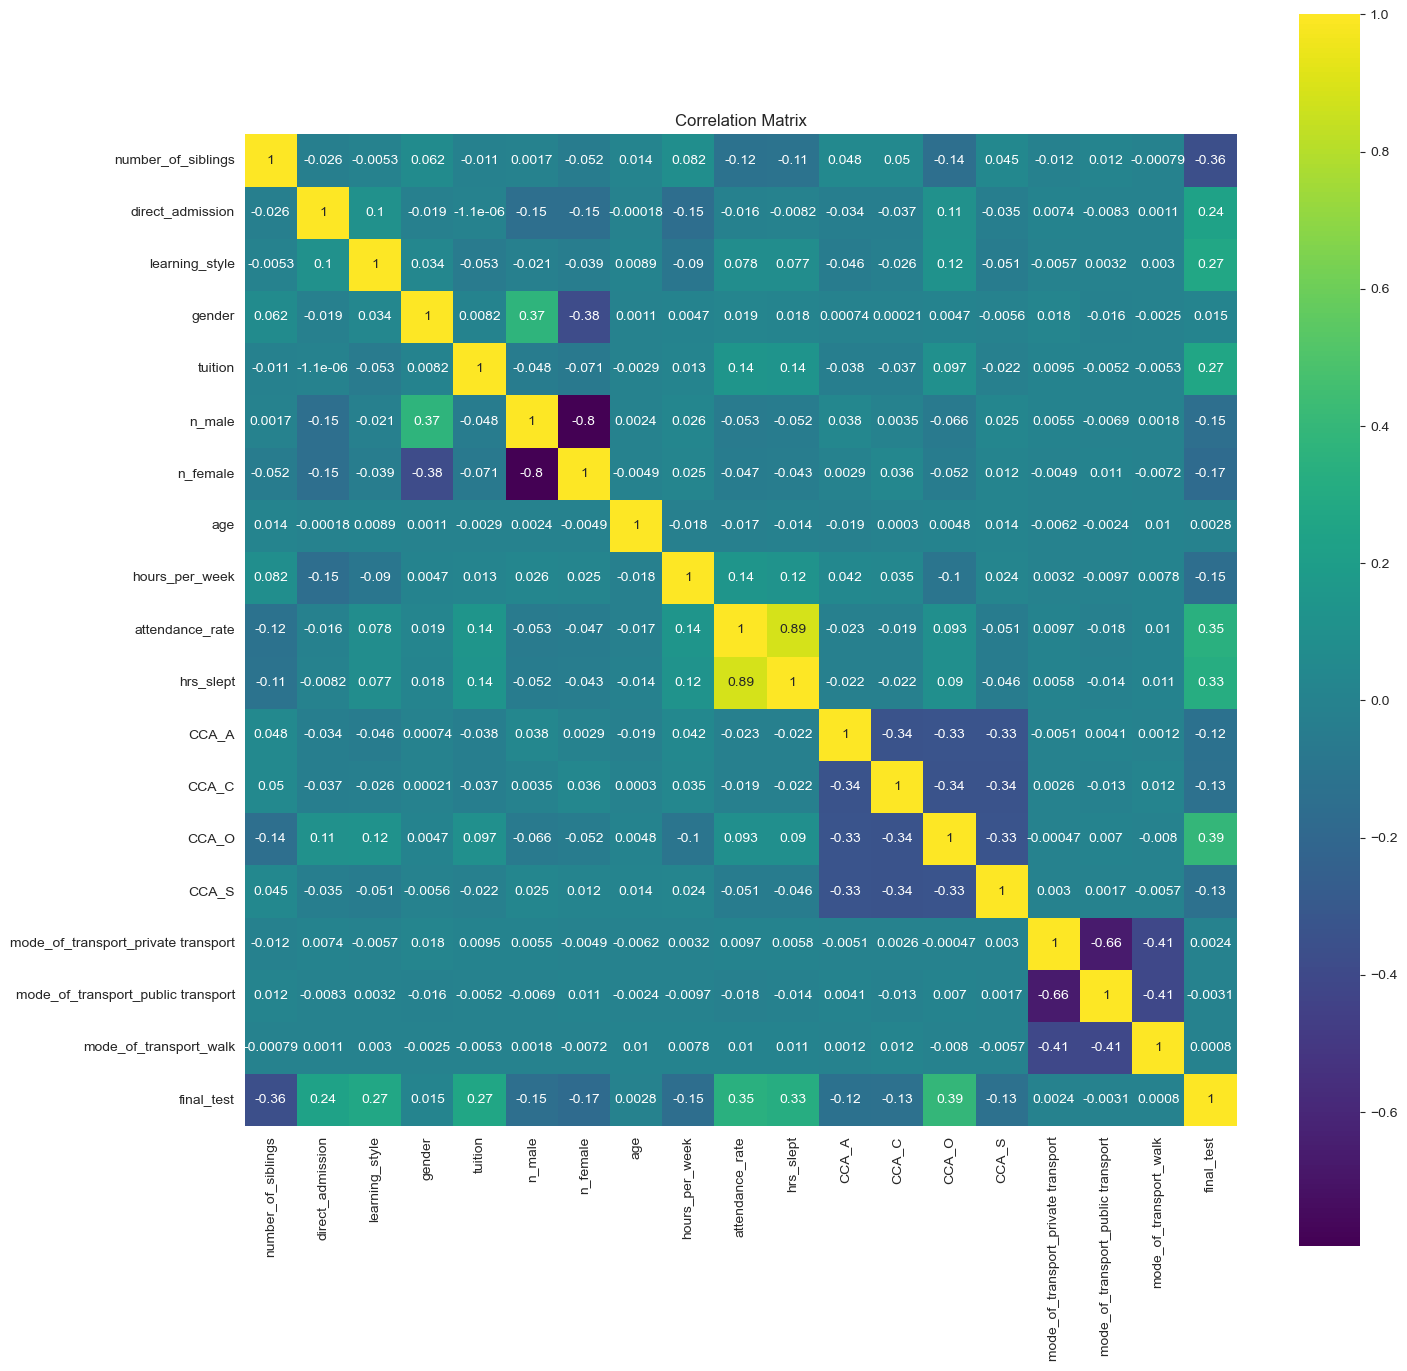

In [58]:
correlation = df4.corr()

plt.figure(figsize =[16, 16]
           )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            cmap = "viridis",
            annot = True)

### Using a simple correlation matrix, we can observe that certain features are more positively correlated to y_scores: direct_admission, learning style=Visual, tuition = Yes, attendance rate, hrs_slept, CCA=None. Other features are negatively correlated to y_scores: number of siblings, CCA=A, C or S, n_males or n_females (ie. a class with excess of one sex over the other is negative). hours_per_week is also negatively correlated beyond a certain number (but the correlation is actually positive up to approx 8.5, before turning negative). Other features have close to zero correlation: age and mode of transport.

## (3) Training Model using OLS
### Since the features are mostly categorical, and many numerical features do not have a wide range, there is no need to regularise the data across features by passing data through a StandardScaler unless the model requires, we can proceed to train-test using several models, comparing performances using R-squared and RMSE. 


In [62]:
## Convert all column names to string type
df4.columns = [str(col) for col in df4.columns]


## We now split Data into Train (80%) Test (20%) sets using prop = int(len(scaled_df)* Split%),and define Train, Test sets using prop to divide them
prop = \
    int(len(df4) * 0.80)

X_train = df4.iloc[  :prop, :-1] # First 80% of the data
X_test  = df4.iloc[prop: , :-1] # Remaining 20% of the data
y_train = df4.iloc[  :prop, -1: ]
y_test = df4.iloc[prop:  , -1: ]

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10784, 18), (2697, 18), (10784, 1), (2697, 1))

In [64]:
X_train.columns

Index(['number_of_siblings', 'direct_admission', 'learning_style', 'gender',
       'tuition', 'n_male', 'n_female', 'age', 'hours_per_week',
       'attendance_rate', 'hrs_slept', 'CCA_A', 'CCA_C', 'CCA_O', 'CCA_S',
       'mode_of_transport_private transport',
       'mode_of_transport_public transport', 'mode_of_transport_walk'],
      dtype='object')

In [65]:

import statsmodels.api as sm
from statsmodels.formula.api import ols



In [66]:
help(ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model.
    data : array_like
        The data for the model. See Notes.
    subset : array_like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`.
    drop_cols : array_like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    *args
        Additional positional argument that are passed to the model.
    **kwargs
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.EvalEnvironm

In [67]:
## we leave out mode_of_transport because there is very little correlation from the correlation matrix. 
formula = ('y_train ~ number_of_siblings + direct_admission + learning_style + gender + tuition + n_male + n_female + hours_per_week + attendance_rate + hrs_slept + CCA_A + CCA_C + CCA_S')
model1 = ols(formula, X_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1132.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:52:36   Log-Likelihood:                -39073.
No. Observations:               10784   AIC:                         7.817e+04
Df Residuals:                   10770   BIC:                         7.828e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             72.9038      1

### By leaving out CCA_0, we avoid the problem of perfect collinearity. The y-intercept now represents effect of CCA_0 = No CCA, with the mean final_test at 72.9038 and the 95% CI is [70.071, 75.736].  CCA (whether of type A, C, or S) will lower the final_test by 6.41~6.88 on average.
### F-stat is significant at 0.00 (<1%) implying that OLS model is better at explaining variance than simple mean model. 
### gender has p-value at 0.072, so it does not pass the correlation test at p-value <= 1%. Direct admission with p-value of 0.011 barely makes it. hours-per-week shows negative correlation because we observed that final_test rises with hours_per_week until approx 8.5, before falling, so it's relationship is non-linear.  
### R-squared and adjusted R-squared are both at 0.577 implying the current features explain 58% of variance and there are no extraneous factors that need to be dropped. So we decide to keep gender for future reference.
### Skew is close to zero and kurtosis is close to 3.  final_test appears close to normal distribution.  D-W test statistic is close to 2.0, indicating there is no more autocorrelation in the residuals, the residuals appear to be homoskedastic 

In [68]:

from sklearn.metrics import r2_score
y_hat_OLS_train = model1.predict(X_train)
### Fitting y using the X_train data
r2_score_OLS_train = r2_score(y_train, y_hat_OLS_train)

print('R2_score_OLS (train): ', r2_score_OLS_train)
### R2_score (train) is the R-square in the linear regression involving only the training data set

R2_score_OLS (train):  0.5774570626708442


In [69]:
from sklearn.metrics import mean_squared_error
### Predicting RMSE -- the Training set results
rmse_OLS_train = (np.sqrt(mean_squared_error(y_train, y_hat_OLS_train)))
print("RMSE_OLS (train): ", rmse_OLS_train)

RMSE_OLS (train):  9.06370756247152


In [70]:
y_hat_OLS_test = model1.predict(X_test)
print(y_hat_OLS_test)

12569    80.173251
12570    57.979282
12572    58.780208
12573    72.006898
12574    65.137104
           ...    
15895    62.128840
15896    72.231743
15897    72.595422
15898    62.465915
15899    72.141686
Length: 2697, dtype: float64


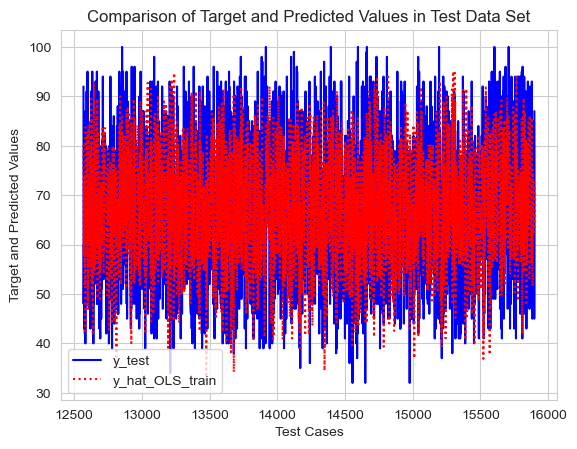

In [71]:
## Comparing y_hat vs final_test in X_train

# d = np.linspace(1, 100, 100)
### creates t ranging from values 1 to 48 with number of points (3rd argument) as 48

plt.plot(y_test, 'blue', linestyle='solid') ### plotting d, Y_test separately 
plt.plot(y_hat_OLS_test, 'red', linestyle='dotted') ### plotting d, Y_hat_OLS_train separately 
plt.xlabel('Test Cases')
plt.ylabel('Target and Predicted Values')
plt.title('Comparison of Target and Predicted Values in Test Data Set')
plt.legend(["y_test", "y_hat_OLS_train"], loc ="lower left")
plt.show()

In [72]:

r2_score_OLS_test = r2_score(y_test, y_hat_OLS_test)

print('R2_score_OLS (test): ', r2_score_OLS_test)

R2_score_OLS (test):  0.5867680876394821


In [73]:
rmse_OLS_test = (np.sqrt(mean_squared_error(y_test, y_hat_OLS_test)))
print("RMSE_OLS : ", rmse_OLS_test)

RMSE_OLS :  9.019299319485297


### The R2_scores and RMSE for Test set is slightly better than for Train set, implying the OLS (model1) is a well-trained model without overfitting.

## (4) Training Model using RF Regressor 

r2_score on train data:  0.7795679482596207
r2_score on test data:  0.7263286614714208
RMSE on train data:  6.546479808526537
RMSE on test data:  7.339906565423635


<Axes: >

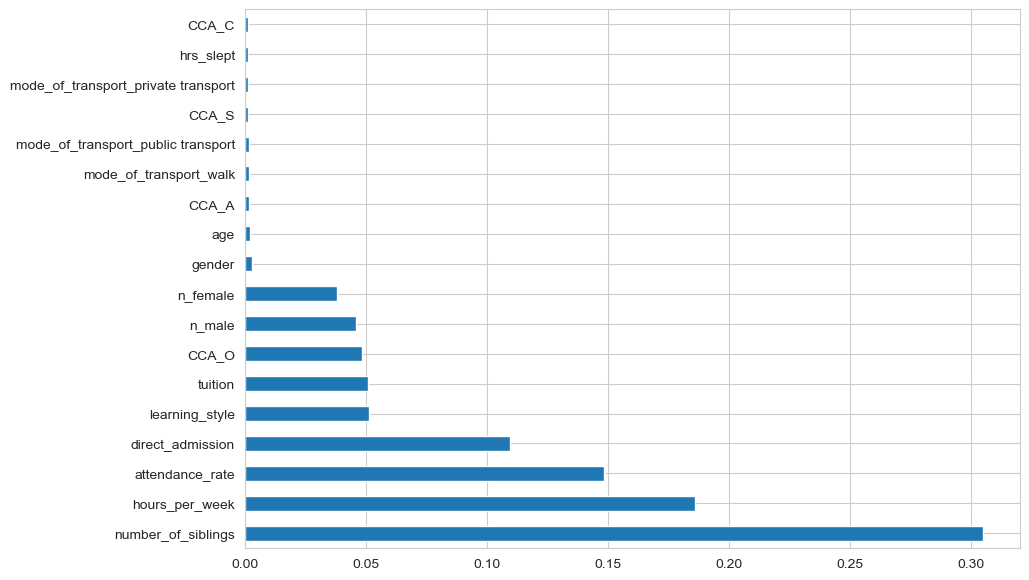

In [78]:
## Trying RF for Feature Importance. A very interesting feature of the random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data. Let us see how can we use this attribute to make our model simpler and better! 

from sklearn.ensemble import  RandomForestRegressor
# create an object of the RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10)


# fit the model with the training data
model2.fit(X_train, y_train)

# predict the target on train and test data
y_hat_RF_train = model2.predict(X_train)
y_hat_RF_test = model2.predict(X_test)

# R-Squared and Root Mean Squared Error on train and test data

r2_score_RF_train = r2_score(y_train, y_hat_RF_train)
rmse_RF_train = (np.sqrt(mean_squared_error(y_train, y_hat_RF_train)))
print('r2_score on train data: ',r2_score_RF_train)
r2_score_RF_test = r2_score(y_test, y_hat_RF_test)
rmse_RF_test = (np.sqrt(mean_squared_error(y_test, y_hat_RF_test)))
print('r2_score on test data: ',r2_score_RF_test)
print('RMSE on train data: ', np.sqrt(mean_squared_error(y_train, y_hat_RF_train)))
print('RMSE on test data: ', np.sqrt(mean_squared_error(y_test, y_hat_RF_test)))

# Feature reduction by plotting the 7 most important features 
plt.figure(figsize=(10,7))

feat_importances = pd.Series(model2.feature_importances_, index = X_train.columns)

feat_importances.nlargest(19).plot(kind='barh')

### The RF (model2) produces r2_score on test data that is lower than train data, implying that the RF model may have too many features that are not explaining the variance.  Using feature_importances, we identify the 9 features that contribute most to variance, by excluding age, gender and mode of transport.  We can also drop CCA categories other than CCA_O (making CCA a binary category, CCA_O = No(1), otherwise Yes(0)). 

In [79]:
## Rerunning RF model with 9 features only
X_train2 = X_train.drop(columns=['age','gender','hrs_slept','mode_of_transport_private transport','mode_of_transport_public transport','mode_of_transport_walk','CCA_A','CCA_C','CCA_S']) # First 80% of the data with 9 features
X_test2  = X_test.drop(columns=['age','gender','hrs_slept','mode_of_transport_private transport','mode_of_transport_public transport','mode_of_transport_walk','CCA_A','CCA_C','CCA_S']) # Remaining 20% of the data with 9 features

In [80]:
X_train2.columns

Index(['number_of_siblings', 'direct_admission', 'learning_style', 'tuition',
       'n_male', 'n_female', 'hours_per_week', 'attendance_rate', 'CCA_O'],
      dtype='object')

In [81]:
# create an object of the RandomForestRegressor
model2 = RandomForestRegressor(max_depth=10)


# fit the model with the training data
model2.fit(X_train2, y_train)

# predict the target on train and test data
y_hat_RF_train = model2.predict(X_train2)
y_hat_RF_test = model2.predict(X_test2)

# R-Squared and Root Mean Squared Error on train and test data

r2_score_RF_train = r2_score(y_train, y_hat_RF_train)
rmse_RF_train = (np.sqrt(mean_squared_error(y_train, y_hat_RF_train)))
print('r2_score on train data: ',r2_score_RF_train)
r2_score_RF_test = r2_score(y_test, y_hat_RF_test)
rmse_RF_test = (np.sqrt(mean_squared_error(y_test, y_hat_RF_test)))
print('r2_score on test data: ',r2_score_RF_test)
print('RMSE on train data: ', np.sqrt(mean_squared_error(y_train, y_hat_RF_train)))
print('RMSE on test data: ', np.sqrt(mean_squared_error(y_test, y_hat_RF_test)))


r2_score on train data:  0.7744043142328019
r2_score on test data:  0.72809786964542
RMSE on train data:  6.622711799035708
RMSE on test data:  7.316142881768893


### The RMSE improved from 7.34 to 7.31 with 9 features only. Hence for Pipeline we decide to proceed with 9 features

## (5) Training Model using Pipeline
### We now build a pipeline that can split the data into cross-folds and train the data on other models, Linear Regression, Decision Tree Regressor, KNN Regressor, GBA, ADA Boost and SVM (kernel = linear).  We pass all data through a Standard Scalar, as some models can only take regularised data.  
### We measure the performance of these models against each other and against OLS model and RF model using the following metrics: R-squared and RMSE. 
 



In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [89]:
df5=pd.DataFrame()
df5=df4.drop(columns=['age','gender','hrs_slept','mode_of_transport_private transport','mode_of_transport_public transport','mode_of_transport_walk','CCA_A','CCA_C','CCA_S'])




In [90]:
valid_size = 0.2

train_size = int(len(df5)*(1-valid_size))

X_train = df5.iloc[  :train_size , :-1]

X_test = (df5.iloc[ train_size: ,  :-1])

y_train, y_test = (df5.iloc[  :train_size , -1: ], df5.iloc[ train_size: ,-1: ])


In [91]:
## Convert all column names to string type
X_train.columns = [str(col) for col in X_train.columns]
X_test.columns = [str(col) for col in X_test.columns]

y_train.columns = [str(col) for col in y_train.columns]
y_test.columns = [str(col) for col in y_test.columns]

In [92]:

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (10784, 9) (10784, 1)
Test set: (2697, 9) (2697, 1)


In [121]:
# Create pipelines for different algorithms, certain algorithms work better with Standard Scalar, so we apply this in the pipeline
pipelines = { }
pipelines = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()),('model', LinearRegression())]),
    'SVM linear kernel with Standard Scaler': Pipeline([('scaler', StandardScaler()),('model', svm.SVC(kernel='linear'))]),
    'SVM Poly kernel with Standard Scaler': Pipeline([('sacler', StandardScaler()), ('model', svm.SVC(kernel='poly'))]),    
    'Decision Tree with Standard Scaler': Pipeline([('scaler', StandardScaler()), ('model',DecisionTreeRegressor())]),
    'ADA Boosting with Standard Scaler': Pipeline([('scaler', StandardScaler()), ('model', AdaBoostRegressor())]),
    'Gradient Boosting with Standard Scaler': Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingRegressor())]),
    'KNN Regressor with Standard Scaler': Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())]),
    'Random Forest with Standard Scaler': Pipeline([('scaler', StandardScaler()),('model', RandomForestRegressor(max_depth=10))]),

    


}


In [122]:
# Train and test each pipeline
for name, pipeline in pipelines.items():
    print(f"Training and testing {name}...")

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Test the pipeline
    y_pred = pipeline.predict(X_test)

    # Evaluate performance
    r2_score_test = r2_score(y_test, y_pred)
    rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))


    print(f"r2_score_test: {r2_score_test}")
    print(f"rmse_test: {rmse_test}")



Training and testing Linear Regression...
r2_score_test: 0.5863689721843566
rmse_test: 9.023653863352802
Training and testing SVM linear kernel with Standard Scaler...
r2_score_test: 0.5796068220631465
rmse_test: 9.097115385802407
Training and testing SVM Poly kernel with Standard Scaler...
r2_score_test: 0.586741547700251
rmse_test: 9.019588948390256
Training and testing Decision Tree with Standard Scaler...
r2_score_test: 0.5231388024533787
rmse_test: 9.688841825212057
Training and testing ADA Boosting with Standard Scaler...
r2_score_test: 0.5710210818827129
rmse_test: 9.189541601128624
Training and testing Gradient Boosting with Standard Scaler...
r2_score_test: 0.7094997417033233
rmse_test: 7.562216989333559
Training and testing KNN Regressor with Standard Scaler...
r2_score_test: 0.6808784889495185
rmse_test: 7.925997175111403
Training and testing Random Forest with Standard Scaler...
r2_score_test: 0.7274722364192041
rmse_test: 7.3245550852768


In [123]:
# Train with cross validation. Doesn't improve performance signficantly as dataset is small. 

### Initialization of Lists:

names = []
kfold_results = []
train_results = []
test_results = []

## Prepare for ten-fold cross validation

num_folds = 10
seed = 4
scoring = "neg_mean_squared_error"

for name, pipeline in pipelines.items():
    print(f"Training and testing {name}...")
    ### Appending Model Names:
    names.append(name)

    ### run K-fold Cross-Validation

    kfold = \
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
         )

    ### Running Cross-Validation:

    cv_results = \
        (
                -1*cross_val_score(pipeline, X_train, y_train,
                                cv = kfold,
                                scoring = scoring)
        )

    # Cross-validation is performed on the training data (X_train, y_train) using the current model. 
    # The neg mean squared error is used, so multiply by -1, so higher the score the better 

    kfold_results.append(cv_results)

    # Fitting the Model on the Entire Training Set:

    # Train the pipeline
    pipeline.fit(X_train, y_train)
    # Train result
    y_hat_train = pipeline.predict(X_train)
    rmse_train = (np.sqrt(mean_squared_error(y_train, y_hat_train)))
    train_results.append(rmse_train)
    # Test the pipeline
    y_pred = pipeline.predict(X_test)
    rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))
    test_results.append(rmse_test)

    # Printing the Results:

    results = "%s: %f (%f) %f %f" % (name, cv_results.mean(),
                                 cv_results.std(),
                                 rmse_train,
                                 rmse_test)
    print(results)


Training and testing Linear Regression...
Linear Regression: 82.454997 (3.184398) 9.069718 9.023654
Training and testing SVM linear kernel with Standard Scaler...
SVM linear kernel with Standard Scaler: 82.501709 (5.532770) 8.946578 9.097115
Training and testing SVM Poly kernel with Standard Scaler...
SVM Poly kernel with Standard Scaler: 78.837922 (5.874495) 8.648141 9.019589
Training and testing Decision Tree with Standard Scaler...
Decision Tree with Standard Scaler: 101.906991 (7.740688) 0.735308 9.748482
Training and testing ADA Boosting with Standard Scaler...
ADA Boosting with Standard Scaler: 85.381939 (2.678298) 9.172894 9.150669
Training and testing Gradient Boosting with Standard Scaler...
Gradient Boosting with Standard Scaler: 60.662033 (1.786604) 7.641820 7.562217
Training and testing KNN Regressor with Standard Scaler...
KNN Regressor with Standard Scaler: 64.133836 (5.123699) 6.437294 7.925997
Training and testing Random Forest with Standard Scaler...
Random Forest with

In [113]:
print('R2_score_OLS (test): ', r2_score_OLS_test, "RMSE_OLS (test): ", rmse_OLS_test)

R2_score_OLS (test):  0.5867680876394821 RMSE_OLS (test):  9.019299319485297


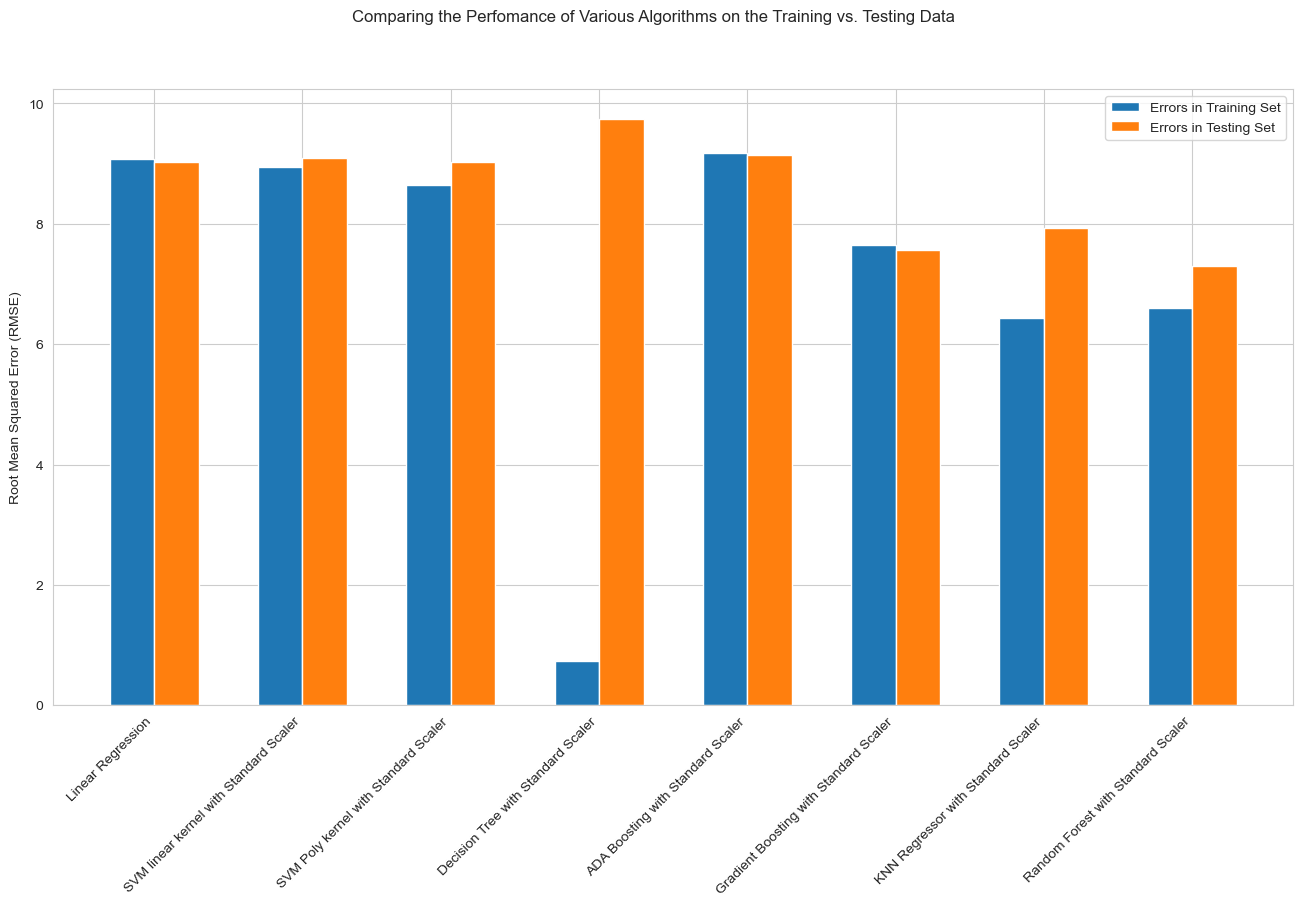

In [124]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
                )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,

      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.

      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 

      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 

      train_results,
      width = width,
      label = "Errors in Training Set")
 )

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
 )

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names, rotation=45, ha='right')
# Set x-axis labels

plt.ylabel("Root Mean Squared Error (RMSE)")

plt.show()

### The Linear Regression is closest to OLS, as the methodology is very similar. Out of all the algorithms, the RF Regressor with Standard Scalar performs significantly better than OLS, giving (R-squared = 0.72, rmse = 7.31 before cross-validation and 7.29 after cross-validation).   
### As observed, the data is mostly linearly correlated, so using a simple algorithm like RF Regressor is good enough, and deep learning methods are not required. 
### In fact, more complicated kernels for SVM like poly or rbf may perform worse for linearly correlated data

## Conclusion: RF Regressor (max depth=10) 
- trained using 9 features (with the CCA_O passed through as a dummy variable)
- with Standard Scalar regularisation
## produced the best performance 
- R-squared: 0.72
- RMSE: 7.29


## (6) We pick the best model RF Regressor to be our DEFAULT, but we will allow user to change this in the Config.ini file to GBA or KNN Regressor if they wish.  We will use the chosen algo and define our pipeline for deployment using make_pipeline in six stages:

(1) Get user input for url of train data, use SQL Lite to retrieve data and pass to dataframe 'df'

(2) Create a ColumnTransformer that will transform the data into numerical variables and categorical variables, including ONE-Hot Encoder where required.
'number_of_siblings' - num 
'direct_admission' - cat (boolean: Yes, No)
'learning_style' - cat (boolean: Visual, Auditory)
'tuition' - cat (boolean: Yes, No)
'n_male' - num
'n_female' - num
'hours_per_week' - num
'attendance_rate' - num
'CCA_O' - cat (ONE-Hot encoder, drop CCA_A, CCA_S, CCA_C)

(3)Perform data preprocessing: 
- Drop the columns that are not required for model training, leaving 9 features and y variable
- Remove NaN values or Impute values where appropriate

(4) Scale the data using StandardScaler()

(5) Pass through the RF Regressor to train the model 

(6) Get user input for url of data for prediction. Run the model and get the predicted value for final_test scores. Export final_test scores to csv file on local file_path

In [1]:
# basic

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import ast as ast

import math
from enum import Enum
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

# mute warnings
import warnings
warnings.filterwarnings("ignore")

# scikit-learn
from sklearn import metrics
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# import category encoders
!pip install category_encoders
import category_encoders as ce

# ML Algo
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

# SQL Lite
import sqlite3
import requests
import sqlalchemy



In [2]:
# Ask User for URL to data file and fetch data from URL
# https://techassessment.blob.core.windows.net/aiap-preparatory-bootcamp/score.db

def get_url_from_user():
    """
    Function to ask the user to input a URL.
    
    Returns:
    url (str): The URL inputted by the user.
    """
    url = input("Please enter the URL to your Training Data: ")
    return url

# Example usage:
if __name__ == "__main__":
    user_url = get_url_from_user()
    print("You entered:", user_url)
    
    response = requests.get(user_url)
    score_data = sqlite3.connect('score.db')
    ## table name is known
    db_name = "score.db"
    table_name = "score"  ## insert table name
    engine = sqlalchemy.create_engine('sqlite:///%s'% db_name, execution_options={"sqlite_raw_colnames":True})
    print("Table Name:", table_name)
    df = pd.DataFrame()
    df = pd.read_sql_table(table_name, engine)
    df = df.dropna()
    df = df.drop_duplicates(subset='student_id')
    df.columns = [str(col) for col in df.columns]

    print(df)



You entered: https://techassessment.blob.core.windows.net/aiap-preparatory-bootcamp/score.db
Table Name: score
       index  number_of_siblings direct_admission     CCA learning_style  \
0          0                   0              Yes  Sports         Visual   
1          1                   2               No  Sports       Auditory   
2          2                   0              Yes    None         Visual   
4          4                   0               No  Sports       Auditory   
5          5                   0               No    Arts         Visual   
...      ...                 ...              ...     ...            ...   
15895  15895                   1               No   Clubs         Visual   
15896  15896                   1              Yes    None       Auditory   
15897  15897                   1              Yes  Sports       Auditory   
15898  15898                   1               No   Clubs         Visual   
15899  15899                   2              Yes    

In [3]:
# Load df

df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,final_test,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,69.0,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,47.0,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green
2,2,0,Yes,None,Visual,B9AI9F,Male,No,85.0,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,66.0,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow
5,5,0,No,Arts,Visual,BA6R14,Female,No,57.0,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,56.0,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,85.0,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,76.0,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,45.0,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow


In [4]:
# There are now 19 columns , including dummies. Move column 'final_test' to the end
df = df[[col for col in df if col != 'final_test'] + ['final_test']]
df

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color,final_test
0,0,0,Yes,Sports,Visual,ACN2BE,Female,No,14.0,2.0,16.0,10.0,91.0,22:00,6:00,private transport,yellow,69.0
1,1,2,No,Sports,Auditory,FGXIIZ,Female,No,4.0,19.0,16.0,7.0,94.0,22:30,6:30,private transport,green,47.0
2,2,0,Yes,None,Visual,B9AI9F,Male,No,14.0,2.0,15.0,8.0,92.0,22:30,6:30,private transport,white,85.0
4,4,0,No,Sports,Auditory,AXZN2E,Male,No,24.0,3.0,16.0,7.0,95.0,21:30,5:30,public transport,yellow,66.0
5,5,0,No,Arts,Visual,BA6R14,Female,No,9.0,12.0,15.0,11.0,96.0,22:30,6:30,private transport,red,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,15895,1,No,Clubs,Visual,XPECN2,Female,No,12.0,14.0,16.0,9.0,96.0,22:00,6:00,private transport,black,56.0
15896,15896,1,Yes,None,Auditory,7AMC7S,Male,Yes,17.0,5.0,16.0,7.0,91.0,22:30,6:30,private transport,white,85.0
15897,15897,1,Yes,Sports,Auditory,XKZ6VN,Female,Yes,7.0,10.0,15.0,7.0,93.0,23:00,7:00,walk,red,76.0
15898,15898,1,No,Clubs,Visual,2OU4UQ,Male,Yes,18.0,12.0,16.0,3.0,94.0,23:00,7:00,walk,yellow,45.0


In [5]:
## Apply Train-test split to data
from sklearn.model_selection import train_test_split
X = pd.DataFrame()
X = df.iloc[ : , :-1]
y = pd.DataFrame()
y = df.iloc[ : , -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (11108, 17) (11108, 1)
Test set: (2777, 17) (2777, 1)


In [6]:
X_train

,index,number_of_siblings,direct_admission,CCA,learning_style,student_id,gender,tuition,n_male,n_female,age,hours_per_week,attendance_rate,sleep_time,wake_time,mode_of_transport,bag_color
12953,12953,1,No,SPORTS,Auditory,ND2A2E,Female,Yes,17.0,11.0,15.0,19.0,92.0,23:00,7:00,walk,red
7209,7209,2,No,Sports,Auditory,2C4PV1,Male,Yes,14.0,4.0,16.0,11.0,91.0,22:30,6:30,private transport,blue
2446,2446,0,Yes,Clubs,Visual,V6EAW3,Female,Yes,4.0,12.0,15.0,8.0,97.0,22:00,6:00,private transport,black
7189,7189,0,No,Sports,Visual,UHFPEM,Male,Yes,15.0,10.0,15.0,10.0,99.0,22:00,6:00,private transport,blue
2996,2996,1,No,Arts,Visual,O2VTM5,Male,No,21.0,9.0,15.0,6.0,95.0,21:30,5:30,public transport,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666,6666,0,No,Arts,Visual,AR6YN0,Male,Yes,27.0,1.0,6.0,11.0,93.0,21:00,5:00,public transport,yellow
751,751,1,Yes,Clubs,Auditory,ZF4NK4,Female,Yes,1.0,16.0,15.0,4.0,91.0,22:00,6:00,private transport,green
12085,12085,0,No,Arts,Auditory,UCPBMW,Female,Yes,3.0,19.0,5.0,8.0,91.0,21:00,5:00,public transport,red
9377,9377,0,No,Clubs,Auditory,RS04X5,Male,Yes,10.0,11.0,15.0,14.0,100.0,23:00,7:00,walk,green


In [7]:
y_train

,final_test
12953,58.0
7209,55.0
2446,81.0
7189,96.0
2996,47.0
...,...
6666,73.0
751,76.0
12085,90.0
9377,75.0


In [8]:
## import BaseEstimator. Grid Search and Pipelines: BaseEstimator is crucial for functionalities like grid search (GridSearchCV) and pipelines (Pipeline). Grid search uses get_params() to explore a range of hyperparameters, while pipelines rely on fit() and predict() to chain together multiple estimators.

from sklearn.base import BaseEstimator

## create class CCAEncoder to apply ONE_Hot Encoder to CCA = None

class CCAEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, df):
        df['CCA_O'] = (df['CCA'] == 'None')*1
        df['learning_style_visual'] = (df['learning_style'] == 'Visual')*1
        df['tuition_Yes'] = (df['tuition'] == 'Yes')*1
        df['direct'] = (df['direct_admission'] == 'Yes')*1

        return df


In [9]:
## Where necessary, impute NaN values with strategy='mean' or 'most frequent' or others
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')



In [10]:
# custom transformer must have methods fit and transform
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['sleep_time',
                                                                        'wake_time',
                                                                        'gender',
                                                                        'student_id',
                                                                        'age',
                                                                        'tuition',
                                                                        'direct_admission',
                                                                        'learning_style',
                                                                        'mode_of_transport',
                                                                        'CCA',
                                                                        'bag_color'])])
                                           


In [11]:
help(make_pipeline)

Help on function make_pipeline in module sklearn.pipeline:

make_pipeline(*steps, memory=None, verbose=False)
    Construct a :class:`Pipeline` from the given estimators.
    
    This is a shorthand for the :class:`Pipeline` constructor; it does not
    require, and does not permit, naming the estimators. Instead, their names
    will be set to the lowercase of their types automatically.
    
    Parameters
    ----------
    *steps : list of Estimator objects
        List of the scikit-learn estimators that are chained together.
    
    memory : str or object with the joblib.Memory interface, default=None
        Used to cache the fitted transformers of the pipeline. The last step
        will never be cached, even if it is a transformer. By default, no
        caching is performed. If a string is given, it is the path to the
        caching directory. Enabling caching triggers a clone of the transformers
        before fitting. Therefore, the transformer instance given to the
     

In [12]:
user_model = RandomForestRegressor(max_depth=10)

sample_pipe = make_pipeline(
    CCAEncoder(), 
    pre_process, 
    StandardScaler(), 
    user_model
)

In [13]:
sample_pipe

Pipeline(steps=[('ccaencoder', CCAEncoder()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['sleep_time', 'wake_time',
                                                   'gender', 'student_id',
                                                   'age', 'tuition',
                                                   'direct_admission',
                                                   'learning_style',
                                                   'mode_of_transport', 'CCA',
                                                   'bag_color'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])

In [14]:
model_pipe = make_pipeline(
    CCAEncoder(), # One_Hot Encoder for CCA = None
    pre_process,
    StandardScaler(),
    RandomForestRegressor(max_depth=10)
)


In [15]:
model_pipe

Pipeline(steps=[('ccaencoder', CCAEncoder()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['sleep_time', 'wake_time',
                                                   'gender', 'student_id',
                                                   'age', 'tuition',
                                                   'direct_admission',
                                                   'learning_style',
                                                   'mode_of_transport', 'CCA',
                                                   'bag_color'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])

In [16]:
# Train the pipeline
model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ccaencoder', CCAEncoder()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['sleep_time', 'wake_time',
                                                   'gender', 'student_id',
                                                   'age', 'tuition',
                                                   'direct_admission',
                                                   'learning_style',
                                                   'mode_of_transport', 'CCA',
                                                   'bag_color'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Test the pipeline
y_pred = model_pipe.predict(X_test)

# Evaluate performance
r2_score_test = r2_score(y_test, y_pred)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("Model_pipe r2_score_test: ", r2_score_test)
print("Model_pipe rmse_test: ", rmse_test)

Model_pipe r2_score_test:  0.7029845185242186
Model_pipe rmse_test:  7.651130580899957


In [17]:
sample_pipe.fit(X_train, y_train)

Pipeline(steps=[('ccaencoder', CCAEncoder()),
                ('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['sleep_time', 'wake_time',
                                                   'gender', 'student_id',
                                                   'age', 'tuition',
                                                   'direct_admission',
                                                   'learning_style',
                                                   'mode_of_transport', 'CCA',
                                                   'bag_color'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Test the pipeline
y_pred = sample_pipe.predict(X_test)

# Evaluate performance
r2_score_test = r2_score(y_test, y_pred)
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred)))

print("Sample_pipe r2_score_test: ", r2_score_test)
print("Sample_pipe rmse_test: ", rmse_test)

Sample_pipe r2_score_test:  0.7053324334348607
Sample_pipe rmse_test:  7.620829388560372


In [ ]:

# Ask User for URL to prediction data file and fetch prediction data from URL
# https://techassessment.blob.core.windows.net/aiap-preparatory-bootcamp/score.db

def get_url_from_user():
    """
    Function to ask the user to input a URL.
    
    Returns:
    url (str): The URL inputted by the user.
    """
    url = input("Please enter the URL to your Prediction Data: ")
    return url

# Example usage:
if __name__ == "__main__":
    user_url = get_url_from_user()
    print("You entered:", user_url)

    response = requests.get(user_url)
    score_data = sqlite3.connect('score.db')
    ## table name is known
    db_name = "score.db"
    table_name = "score"  ## insert table name
    engine = sqlalchemy.create_engine('sqlite:///%s'% db_name, execution_options={"sqlite_raw_colnames":True})
    print("Table Name:", table_name)
    df1 = pd.DataFrame()
    df1 = pd.read_sql_table(table_name, engine)
    df1 = df.dropna()
    df1 = df.drop_duplicates(subset='student_id')
    df1.columns = [str(col) for col in df.columns]

    print(df1)


In [ ]:
# There are now 19 columns , including dummies. 'final_test' column should be blank, so move column 'final_test' to the end
df1 = df1[[col for col in df if col != 'final_test'] + ['final_test']]

## Drop final_test from Prediction Data 
X = pd.DataFrame()
X = df1.iloc[ : , :-1]
X.set_index('student_id', inplace=True)  ## we want to preserve student_id so we can match our predicted final_test score back to a specific student
X


In [ ]:
predict_pipe = make_pipeline(
    CCAEncoder(), # One_Hot Encoder for CCA = None
    pre_process,
    StandardScaler(),
    model_pipe.predict(X),
    print(model_pipe.predict(X))
    
)


In [ ]:
y_prediction = model_pipe.predict(X)
y_p = pd.DataFrame()
y_p = pd.DataFrame(y_prediction)
X_index = pd.DataFrame(X.index)  ## put the student_id back to the predicted final_test scores
y_df = pd.concat([X_index, y_p], axis=1)



In [ ]:
y_df

In [ ]:
# Ask User for URL for file_path for saving y_prediction df
# C:\Users\hclee\Desktop\prediction.csv

def get_url_from_user():
    """
    Function to ask the user to input a file_path.
    
    Returns:
    url (str): The URL inputted by the user.
    """
    url = input("Please enter the file_path with final name ending in csv on your local drive where you want to save your final_test score prediction")
    
    return url

# Example usage:
if __name__ == "__main__":
    file_path = get_url_from_user()
    print("You entered:", file_path)


In [ ]:

y_df.to_csv(file_path, index=False)

# retrieve y_df to make sure it was saved
y_df_final = pd.read_csv(file_path)
y_df_final

In [ ]:
import joblib
joblib.dump(model_pipe, "model_pipe.joblib")

In [ ]:
model_pipe2 = joblib.load("model_pipe.joblib")
model_pipe2

In [ ]:
%whos